# Comparison among MJ/LJ/KB
Data link: https://www.kaggle.com/xvivancos/michael-jordan-kobe-bryant-and-lebron-james-stats

In [1]:
# Import libs and load data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

total = pd.read_csv('nba/totals_stats.csv')

In [2]:
# Data check
total.head()

,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player,RSorPO
0,2003-04,19,CLE,NBA,SG,79,79,3122,622,1492,...,333,432,465,130,58,273,149,1654,Lebron James,Regular Season
1,2004-05,20,CLE,NBA,SF,80,80,3388,795,1684,...,477,588,577,177,52,262,146,2175,Lebron James,Regular Season
2,2005-06,21,CLE,NBA,SF,79,79,3361,875,1823,...,481,556,521,123,66,260,181,2478,Lebron James,Regular Season
3,2006-07,22,CLE,NBA,SF,78,78,3190,772,1621,...,443,526,470,125,55,250,171,2132,Lebron James,Regular Season
4,2007-08,23,CLE,NBA,SF,75,74,3027,794,1642,...,459,592,539,138,81,255,165,2250,Lebron James,Regular Season


### Collecting each player's data

In [3]:
mj = total.loc[total['Player'] == 'Michael Jordan']
kb = total.loc[total['Player'] == 'Kobe Bryant']
lj = total.loc[total['Player'] == 'Lebron James']

### Analysis of points PTS per season

In [4]:
def pts(lst, season):
    print('===', season, 'PTS of', lst['Player'].iloc[0], '===')
    print('Max:', lst[lst['RSorPO'] == season]['PTS'].max())
    print('Min:', lst[lst['RSorPO'] == season]['PTS'].min())
    print('Mean:', lst[lst['RSorPO'] == season]['PTS'].mean())

pts(mj, 'Regular Season')
pts(mj, 'Playoffs')

=== Regular Season PTS of Michael Jordan ===
Max: 3041
Min: 408
Mean: 2152.8
=== Playoffs PTS of Michael Jordan ===
Max: 759
Min: 107
Mean: 460.53846153846155


In [5]:
pts(kb, 'Regular Season')
pts(kb, 'Playoffs')

=== Regular Season PTS of Kobe Bryant ===
Max: 2832
Min: 83
Mean: 1682.15
=== Playoffs PTS of Kobe Bryant ===
Max: 695
Min: 74
Mean: 376.0


In [6]:
pts(lj, 'Regular Season')
pts(lj, 'Playoffs')

=== Regular Season PTS of Lebron James ===
Max: 2478
Min: 1505
Mean: 2033.9375
=== Playoffs PTS of Lebron James ===
Max: 748
Min: 320
Mean: 531.6153846153846


### Correlation analysis

In [7]:
# Jordan
df = mj[['Age', '3P', '3P%', '2P', '2P%', 'FT', 'FT%', 'AST', 'PTS']]
df.corr()

,Age,3P,3P%,2P,2P%,FT,FT%,AST,PTS
Age,1.000000,0.290232,-0.035277,0.082216,-0.384230,-0.054735,-0.631634,0.019314,0.072809
3P,0.290232,1.000000,0.117474,0.500734,0.228476,0.437639,-0.051189,0.463695,0.555683
3P%,-0.035277,0.117474,1.000000,-0.324341,-0.074885,-0.343007,0.260415,-0.305065,-0.304493
2P,0.082216,0.500734,-0.324341,1.000000,0.413344,0.968717,0.017867,0.946129,0.996205
2P%,-0.384230,0.228476,-0.074885,0.413344,1.000000,0.441633,0.270133,0.479219,0.423455
FT,-0.054735,0.437639,-0.343007,0.968717,0.441633,1.000000,0.054380,0.912124,0.975268
FT%,-0.631634,-0.051189,0.260415,0.017867,0.270133,0.054380,1.000000,0.047031,0.021087
AST,0.019314,0.463695,-0.305065,0.946129,0.479219,0.912124,0.047031,1.000000,0.940584
PTS,0.072809,0.555683,-0.304493,0.996205,0.423455,0.975268,0.021087,0.940584,1.000000


#### 2P/FT/AST highly correlated to PTS

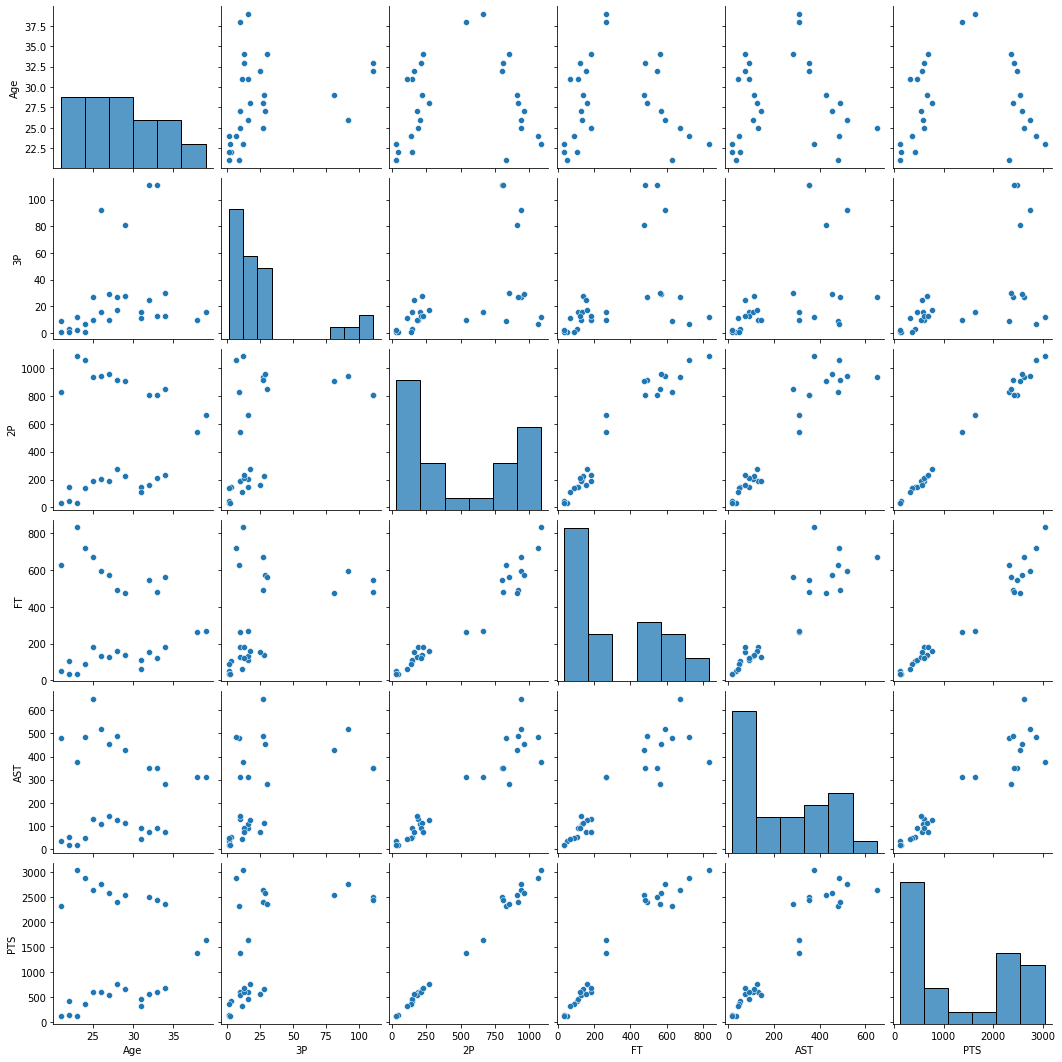

In [8]:
df2 = mj[['Age', '3P', '2P', 'FT', 'AST', 'PTS']]
sns.pairplot(data = df2)

In [9]:
# Kobe
df3 = kb[['Age', '3P', '2P', 'FT', 'AST', 'PTS']]
df3.corr()

,Age,3P,2P,FT,AST,PTS
Age,1.000000,0.336151,0.130215,0.129566,0.170432,0.171138
3P,0.336151,1.000000,0.810912,0.886377,0.824167,0.888954
2P,0.130215,0.810912,1.000000,0.963755,0.964207,0.987248
FT,0.129566,0.886377,0.963755,1.000000,0.962431,0.988469
AST,0.170432,0.824167,0.964207,0.962431,1.000000,0.967969
PTS,0.171138,0.888954,0.987248,0.988469,0.967969,1.000000


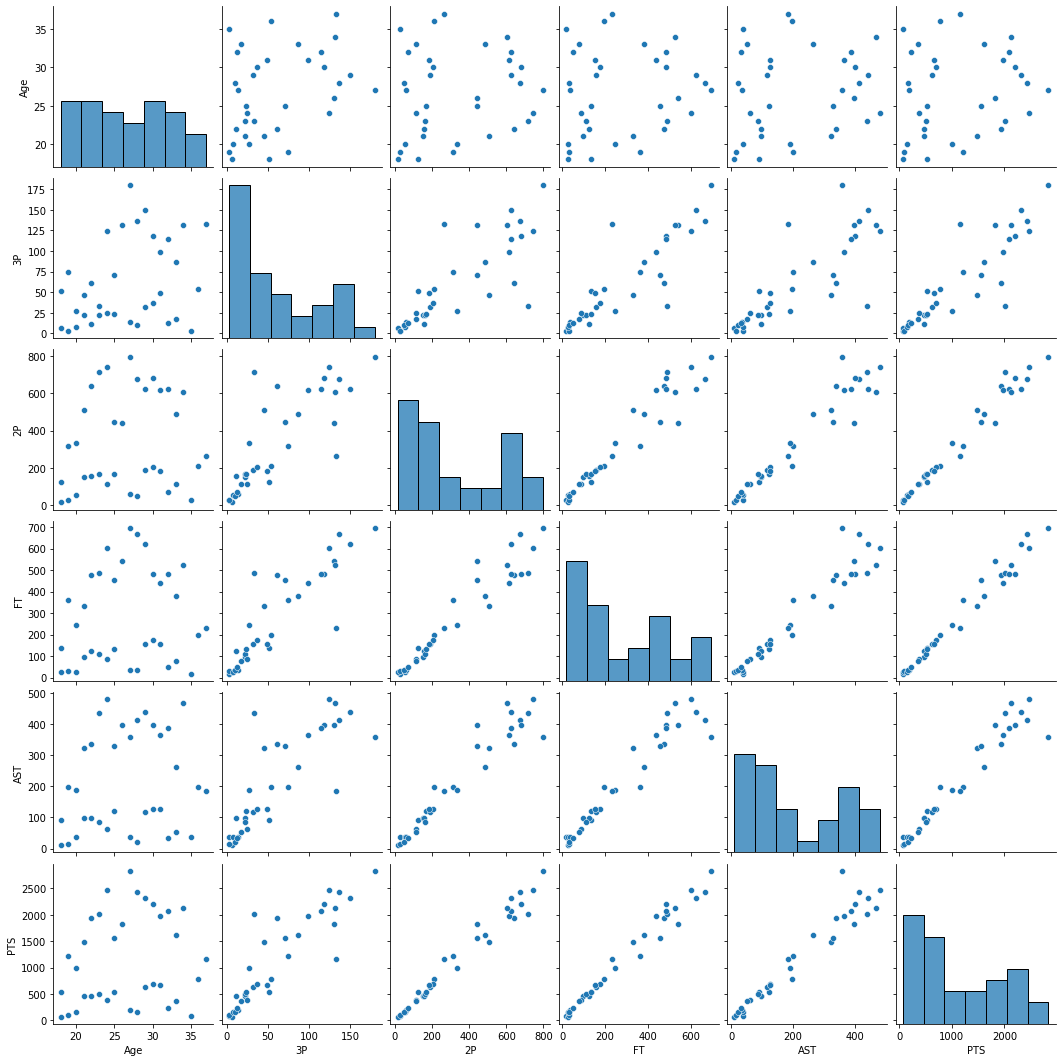

In [10]:
sns.pairplot(data = df3)

In [11]:
# Lebron
df4 = lj[['Age', '3P', '2P', 'FT', 'AST', 'PTS']]
df4.corr()

,Age,3P,2P,FT,AST,PTS
Age,1.000000,0.094005,-0.078093,-0.248358,0.037293,-0.089355
3P,0.094005,1.000000,0.910980,0.879938,0.955507,0.938661
2P,-0.078093,0.910980,1.000000,0.944876,0.958084,0.994056
FT,-0.248358,0.879938,0.944876,1.000000,0.894657,0.966837
AST,0.037293,0.955507,0.958084,0.894657,1.000000,0.963955
PTS,-0.089355,0.938661,0.994056,0.966837,0.963955,1.000000


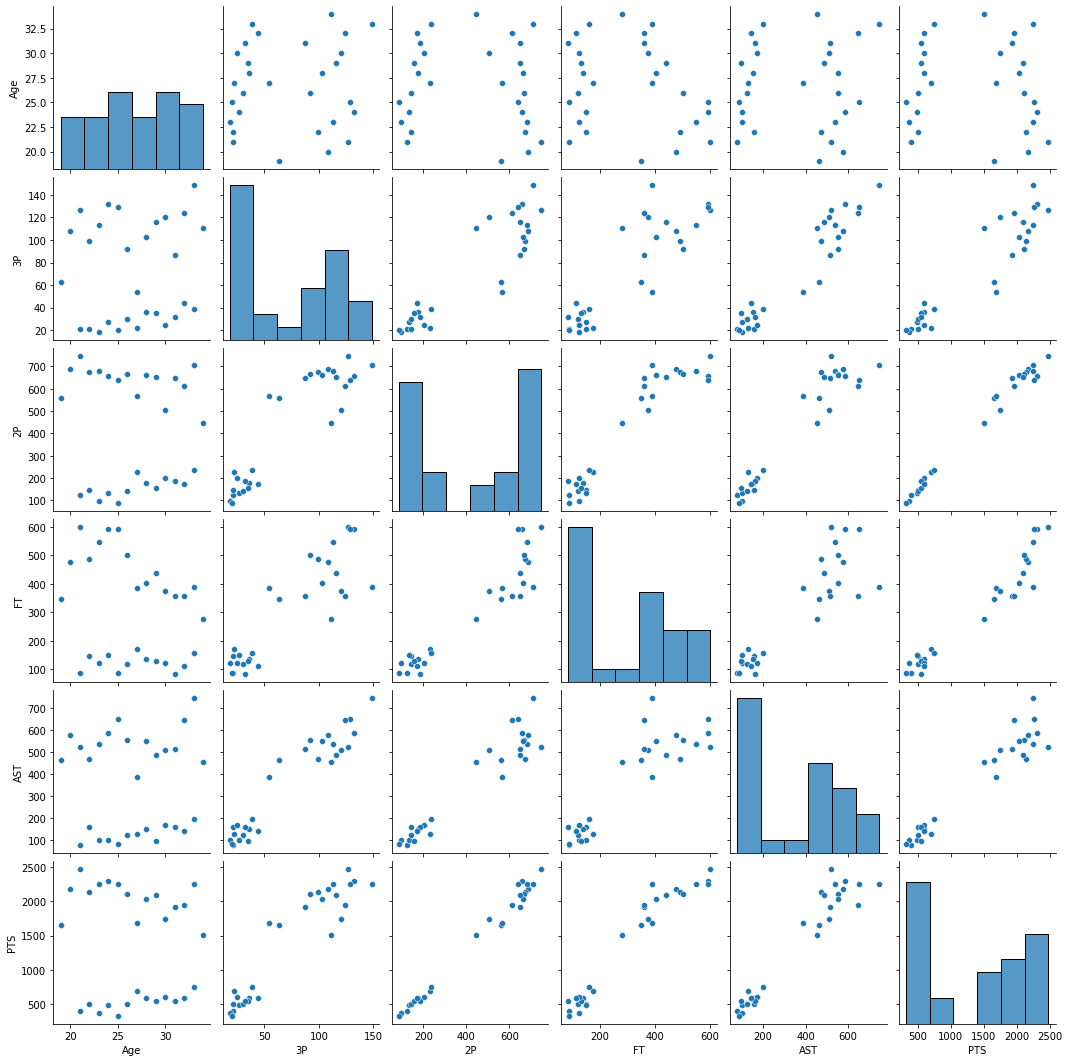

In [12]:
sns.pairplot(data = df4)

<AxesSubplot:>

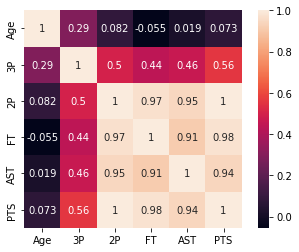

In [13]:
# Jordan
sns.heatmap(df2.corr(), square=True, annot=True)

<AxesSubplot:>

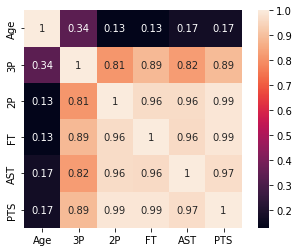

In [14]:
# Kobe
sns.heatmap(df3.corr(), square=True, annot=True)

<AxesSubplot:>

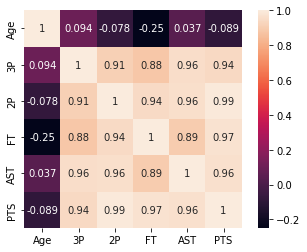

In [15]:
# Lebron
sns.heatmap(df4.corr(), square=True, annot=True)